<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Clustering_(SUNSUPERVISED_LEARNING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clusterig preprocessing

In [2]:
import pandas as pd
data=pd.read_csv("/content/Mall_Customers(3).csv")

data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [5]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [7]:
agglomerative=pd.DataFrame(clust_labels)
display(agglomerative)

,0
0,4
1,3
2,1
3,2
4,0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

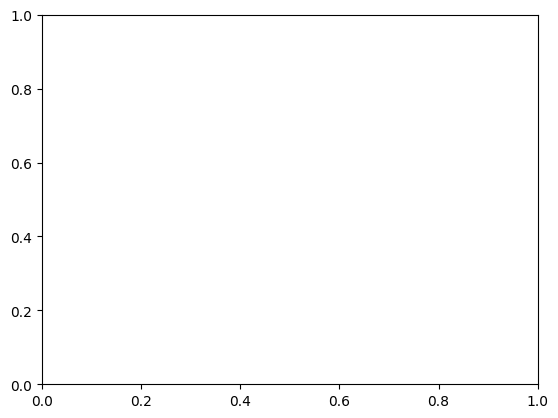

In [10]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative[0].tolist(), s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

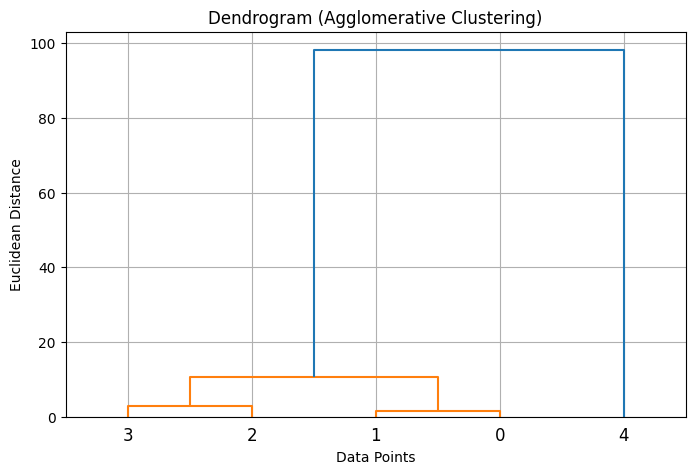

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.array([
    [1, 2],
    [2, 3],
    [5, 8],
    [8, 8],
    [25, 80]
])

# Step 1: Create linkage matrix
linked = linkage(data, method='ward')

# Step 2: Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram (Agglomerative Clustering)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()
